### 1. 결정트리와 SVM으로 학습하고 예측을 수행한 후
### 각각 혼돈행렬, 정확도, 정밀도, 재현율, F1스코어를 계산하세요.


In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('pima-indians-diabetes.csv', skiprows=9, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)

df.columns = ['pregnant', 'plasma', 'hg', 'mm', 'mu', 'bmi', 'd','age', 'class']
df.head()

,pregnant,plasma,hg,mm,mu,bmi,d,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# 결정 트리 점수
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2022)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1].values, df.iloc[:, -1].values, stratify=df.iloc[:, -1].values, test_size=0.2,
    random_state=2022
)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.6948051948051948

In [19]:
# 혼돈행렬
from sklearn.metrics import confusion_matrix
print(f'혼돈행렬:{confusion_matrix(y_test, dtc.predict(X_test))}')
# 정확도
from sklearn.metrics import accuracy_score
print(f'정확도:{accuracy_score(y_test, dtc.predict(X_test))}')
# 재현율
from sklearn.metrics import recall_score
print(f'재현율:{recall_score(y_test, dtc.predict(X_test))}')
# F1
from sklearn.metrics import f1_score
print(f'F1:{f1_score(y_test, dtc.predict(X_test))}')

혼돈행렬:[[74 26]
 [21 33]]
정확도:0.6948051948051948
재현율:0.6111111111111112
F1:0.5840707964601771


In [18]:
# SVM
from sklearn.svm import SVC
svc = SVC(random_state=2022)
svc.fit(X_train, y_train)
print(f'혼돈행렬:{confusion_matrix(y_test, svc.predict(X_test))}')
print(f'정확도:{accuracy_score(y_test, svc.predict(X_test))}')
print(f'재현율:{recall_score(y_test, svc.predict(X_test))}')
print(f'F1:{f1_score(y_test, svc.predict(X_test))}')

혼돈행렬:[[85 15]
 [25 29]]
정확도:0.7402597402597403
재현율:0.5370370370370371
F1:0.5918367346938775


### 2. 결정 트리에서 max_depth, min_samples_split, min_samples_leaf 값을 
### 하나씩 선택해서 트리 그림을 그려보세요.

In [24]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

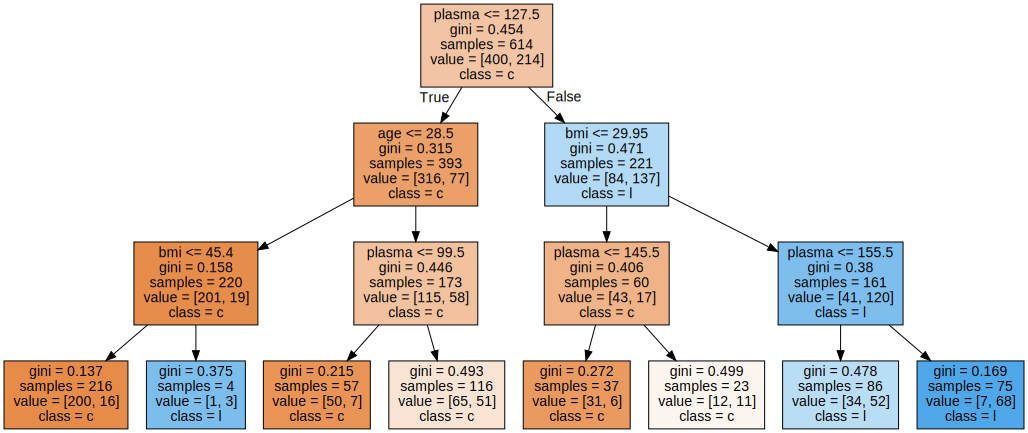

In [30]:
# max_depth = 3
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=2021)
dtc2.fit(X_train, y_train)
from sklearn.tree import export_graphviz
export_graphviz(
    dtc2, out_file='tree.dot1',
    feature_names= df.columns[:-1], class_names = df.columns[-1],
    impurity=True, filled=True
)
import graphviz

with open('tree.dot1') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

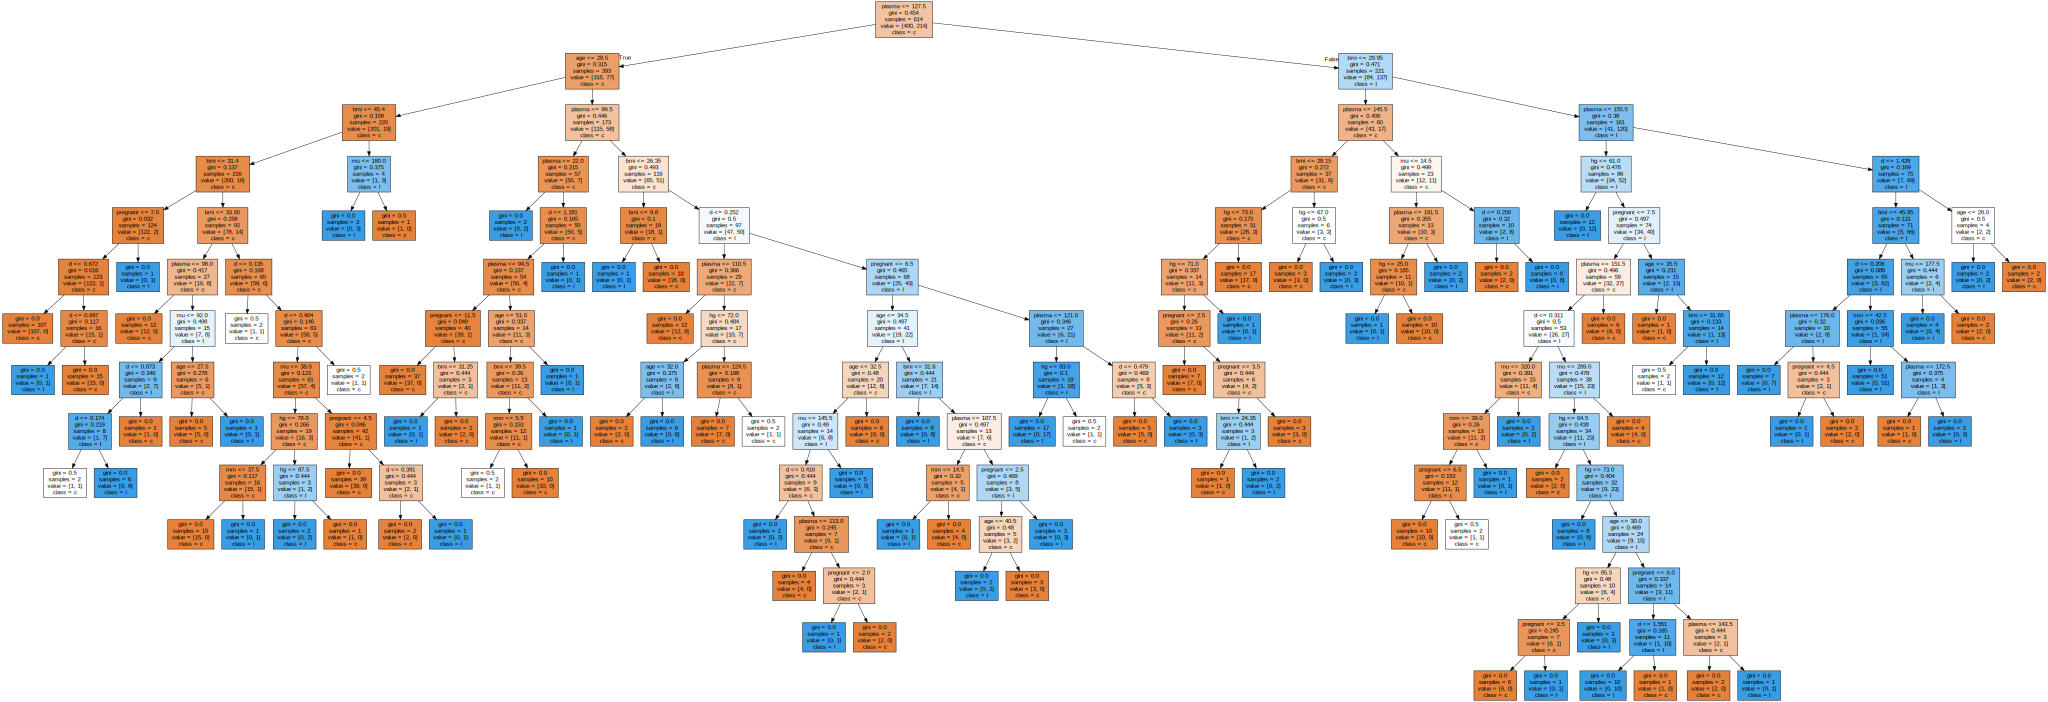

In [31]:
# min_samples_split = 3
dtc3 = DecisionTreeClassifier(min_samples_split = 3, random_state=2021)
dtc3.fit(X_train, y_train)
from sklearn.tree import export_graphviz
export_graphviz(
    dtc3, out_file='tree.dot2',
    feature_names= df.columns[:-1], class_names = df.columns[-1],
    impurity=True, filled=True
)
import graphviz

with open('tree.dot2') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

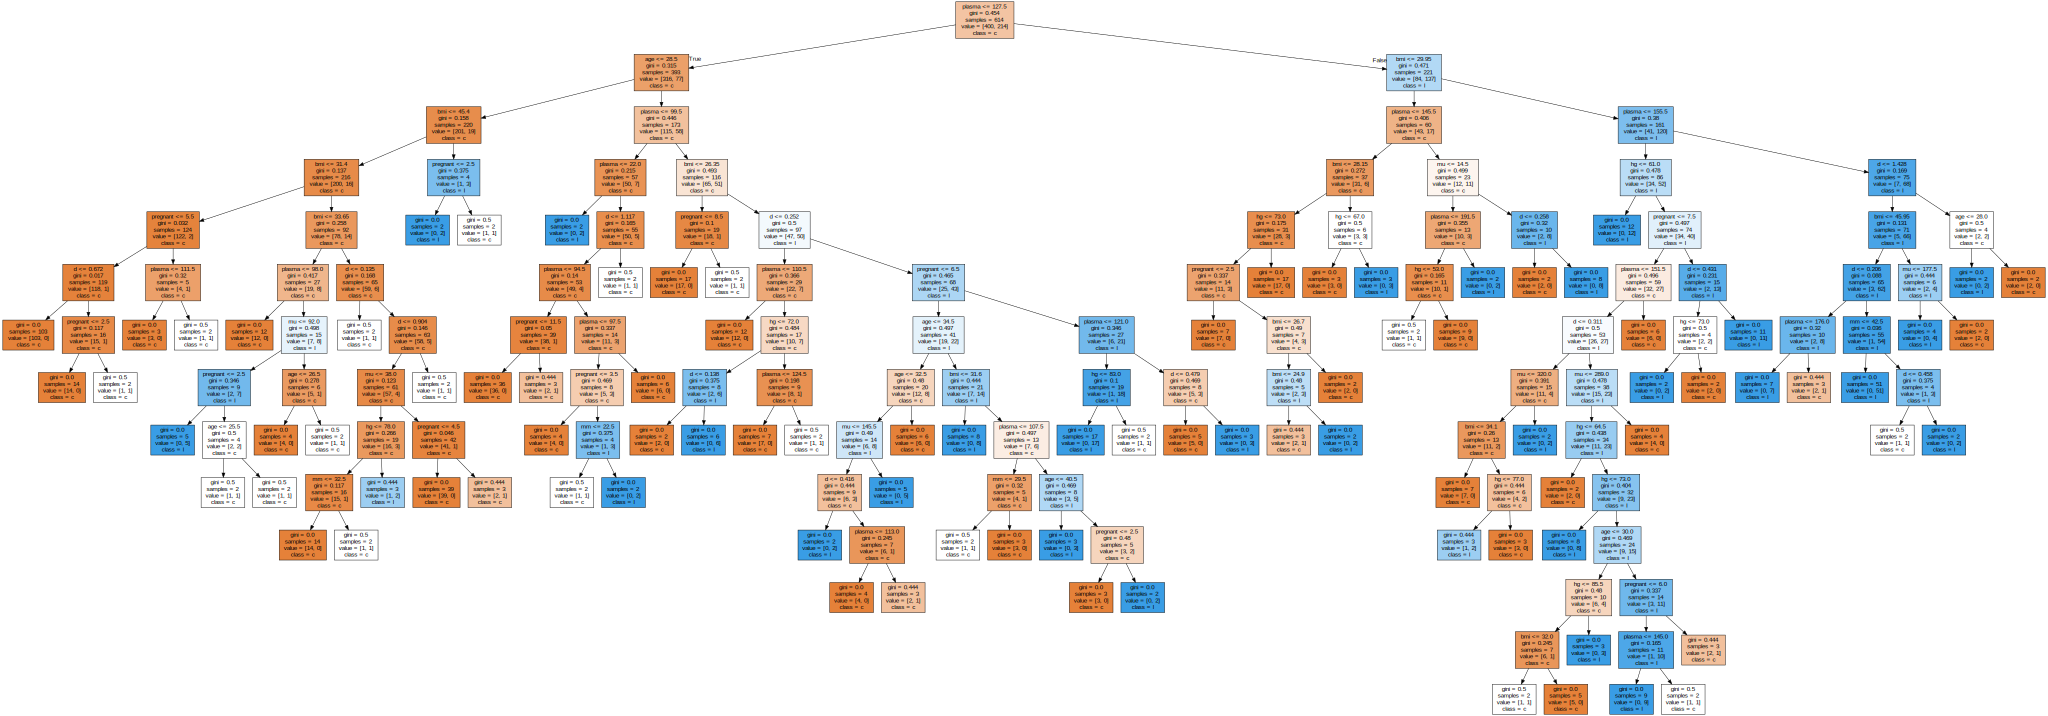

In [32]:
# min_samples_leaf = 2
dtc4 = DecisionTreeClassifier(min_samples_leaf = 2, random_state=2021)
dtc4.fit(X_train, y_train)
from sklearn.tree import export_graphviz
export_graphviz(
    dtc4, out_file='tree.dot3',
    feature_names= df.columns[:-1], class_names = df.columns[-1],
    impurity=True, filled=True
)
import graphviz

with open('tree.dot3') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

### 3. 두가지 모델에 대해서 GridSearchCV를 사용해서 best가 되는 경우의 
### 파라미터 값과 그때의 정확도를 계산하세요.

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
#SVC 모델
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state=2021)
params = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'max_iter' : [-10, -1, 1, 10, 100]
}

grid_svc = GridSearchCV(
    svc, params, scoring='accuracy', cv=5
)
grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_, grid_svc.best_score_)
best_svc = grid_svc.best_estimator_
best_svc.score(X_test, y_test)

{'C': 1, 'max_iter': -1} 0.7621351459416232


0.7402597402597403

In [46]:
#결정트리 모델
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=2021)
params = {
    'max_depth' : [3, 4, 5, 6, 7],
    'min_samples_leaf' : [1, 2, 3],
    'min_samples_split' : [1, 2, 3, 4]
}

grid_dtc = GridSearchCV(
    dtc, params, scoring='accuracy', cv=5
)
grid_dtc.fit(X_train, y_train)
print(grid_dtc.best_params_, grid_dtc.best_score_)
best_dtc = grid_dtc.best_estimator_
best_dtc.score(X_test, y_test)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.7637878182060509


0.6883116883116883

In [48]:
!jupyter nbconvert --to html /content/drive/MyDrive/multi/0425/과제.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/multi/0425/과제.ipynb to html
[NbConvertApp] Writing 745173 bytes to /content/drive/MyDrive/multi/0425/과제.html
